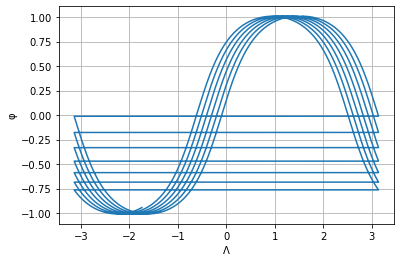

In [4]:
# C. Ground-track of the satellite for 3 days



import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
import math as ma

a0=5737.4;
e0=0.61;
i0=57.82;
Ω0=0;
ω0=90;
f0=0;
R_moon=1738.1;


t0=0;
tmax1 = 259200; #3 days
#tmax2 = 2592000; #30 days
#mu=a0*a0*a0*(2*np.pi/tmax1)**2
mu=4902.8

#Rotation Matrix 3
def R3(Om):
    R3=np.array([[np.cos(Om),np.sin(Om),0],[-np.sin(Om),np.cos(Om),0],[0,0,1]])
    return R3
#Rotation Matrix 1
def R1(i):
    R1=np.array([[1,0,0],[0,np.cos(i),np.sin(i)],[0,-np.sin(i),np.cos(i)]])
    return R1
#Convert Keplerian elements to Cartesian.
def kep2car(kep,GM):
    a,e,i,Om,w,f=kep
    p=a*(1-e**2)
    r=p/(1+e*np.cos(f))
    r_perifocal_vec=np.array([[r*np.cos(f)],[r*np.sin(f)],[0]])
    v_perifocal_vec=np.array([[-np.sqrt(GM/p)*np.sin(f)],[np.sqrt(GM/p)*(e+np.cos(f))],[0]])
    Tpqw_eci=np.transpose(np.dot(np.dot(R3(w),R1(i)),R3(Om)))
    r_eci=np.dot(Tpqw_eci,r_perifocal_vec)
    x=float(r_eci[0])
    y=float(r_eci[1])
    z=float(r_eci[2])
    v_eci=np.dot(Tpqw_eci,v_perifocal_vec)
    vx=float(v_eci[0])
    vy=float(v_eci[1])
    vz=float(v_eci[2])
    return [x,y,z,vx,vy,vz]



IC = [ a0 , e0, np.deg2rad(i0), np.deg2rad(Ω0), np.deg2rad(ω0), f0 ];
ICCAR = kep2car(IC,mu);

def rhs_2bp(t , X):
    x, y, z, vx, vy, vz = X
    r = np.sqrt(x**2+y**2+z**2)
    r3 = r*r*r
    x_dot = vx
    y_dot = vy
    z_dot = vz
    vx_dot = - (mu*x)/r3 
    vy_dot = - (mu*y)/r3 
    vz_dot = - (mu*z)/r3 
    return [x_dot, y_dot, z_dot, vx_dot, vy_dot, vz_dot]

ω_moon = 2.66186*(10**(-6));

lambda_ECEF=[]
phi_ECEF=[]

# solve 2-body problem in cartesian coordinates
sol = solve_ivp(rhs_2bp, [t0, tmax1], ICCAR ,t_eval=np.linspace(0,tmax1,100000),method='DOP853',atol=1e-13,rtol=1e-13)

for i in range(0, len(sol.t)):
    theta_G1 = np.array(ω_moon*sol.t[i])
    Rz = np.array([[(np.cos(theta_G1)), (np.sin(theta_G1)), 0],[-(np.sin(theta_G1)), (np.cos(theta_G1)), 0], [0, 0, 1]])
    rECEF = np.dot(Rz,sol.y[:3,i]) 
    xECEF = rECEF[0]
    yECEF = rECEF[1]
    zECEF = rECEF[2]
    Lambda = np.arctan2(rECEF[1], rECEF[0])
    phi = np.arctan2(rECEF[2], np.sqrt(rECEF[0]**2 + rECEF[1]**2))
    lambda_ECEF.append(Lambda)
    phi_ECEF.append(phi)

plt.figure(1)
plt.plot(lambda_ECEF, phi_ECEF)
plt.xlabel('Λ')
plt.ylabel('φ')
plt.grid()
plt.show()    